#**House Price Prediction Using Linear Regression**

Accurately predicting house prices is a key challenge in the real estate industry. Buyers, sellers, and investors rely on data-driven insights to make well-informed decisions. In this project, we build a machine learning model to predict the sale price of houses based on various physical and categorical attributes of the property.

The dataset includes 81 features, covering a wide range of property characteristics such as:

* Area-related features: total living area, basement size, garage area

* Structural details: number of bathrooms, number of floors, type of foundation

* Amenities: presence of a pool, fireplace, garage

* Location and sale information: neighborhood, year sold, sale type, etc.

We use Linear Regression, a fundamental machine learning algorithm, to model the relationship between these features and the house price. The goal is to:

* Analyze which features most influence house prices

* Preprocess and transform the data (handle missing values, encode categories, scale features)

* Select important features to improve model performance

* Train and evaluate a linear regression model

* Predict accurate prices for new housing data

By the end of this project, we aim to deliver a model that provides reasonable and interpretable house price estimates, along with insights into the most impactful features driving house prices.

In [2]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_test = pd.read_csv(r"/content/drive/MyDrive/House Prediction/test (1).csv")
df_train= pd.read_csv(r"/content/drive/MyDrive/House Prediction/train (1).csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
print("train shape:",df_train.shape)
print("test shape :",df_test.shape)

train shape: (1460, 81)
test shape : (1459, 80)


In [7]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.duplicated().sum()

np.int64(0)

In [9]:
df_test.duplicated().sum()

np.int64(0)

### There is no duplicates. But the number of columns in train and test data is different. It needs to be handled for smooth preprocessing.




In [10]:
missing_percent_train=df_train.isnull().mean()*100
missing_percent_train.sort_values(ascending=False).head(10)


,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageQual,5.547945
GarageFinish,5.547945
GarageType,5.547945


In [11]:
missing_percent_test=df_test.isnull().mean()*100
missing_percent_test.sort_values(ascending=False).head(10)


,0
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
MasVnrType,61.274846
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageCond,5.346127
GarageFinish,5.346127



### There are more than 50 per cent missing values in certain columns in both train and test data. It needs to be removed . Rest of the values have to be imputed with central tendencies.</font><br>

In [12]:
# Drop columns with missing values greater than 50 percent
df_train = df_train.loc[:,missing_percent_train<=50]
df_test = df_test.loc[:,missing_percent_test<=50]


In [13]:
print("train shape:",df_train.shape)
print("test shape :",df_test.shape)

train shape: (1460, 76)
test shape : (1459, 74)


In [14]:
# Selecting common columns in train and test data.

# Get the intersection (common columns) between train and test
common_columns = df_train.columns.intersection(df_test.columns)

# Keep only those columns in both dataframes
df_train_common = df_train[common_columns].copy()
df_test_common = df_test[common_columns].copy()

# Saved target variable as y train.
y_train = df_train["SalePrice"]



In [15]:
# Imputing numerical missing values with median and categorical values with its mode.

for col in df_train_common.columns:
  if df_train_common[col].isnull().any() or df_test_common[col].isnull().any():
    if df_train_common[col].dtype in ["int64","float64"] :
      df_train_common[col]=df_train_common[col].fillna(df_train_common[col].median())
      df_test_common[col]=df_test_common[col].fillna(df_test_common[col].median())
    else:
      df_train_common[col]=df_train_common[col].fillna(df_train_common[col].mode()[0])
      df_test_common[col]=df_test_common[col].fillna(df_test_common[col].mode()[0])

In [16]:
df_train_common.isnull().mean()*100

,0
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
...,...
MiscVal,0.0
MoSold,0.0
YrSold,0.0
SaleType,0.0


In [17]:
df_test_common.isnull().mean()*100

,0
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
...,...
MiscVal,0.0
MoSold,0.0
YrSold,0.0
SaleType,0.0


###**Handling Outliers**

/tmp/ipython-input-18-3282601923.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(numeric_df.values, labels=numeric_df.columns, vert=True)


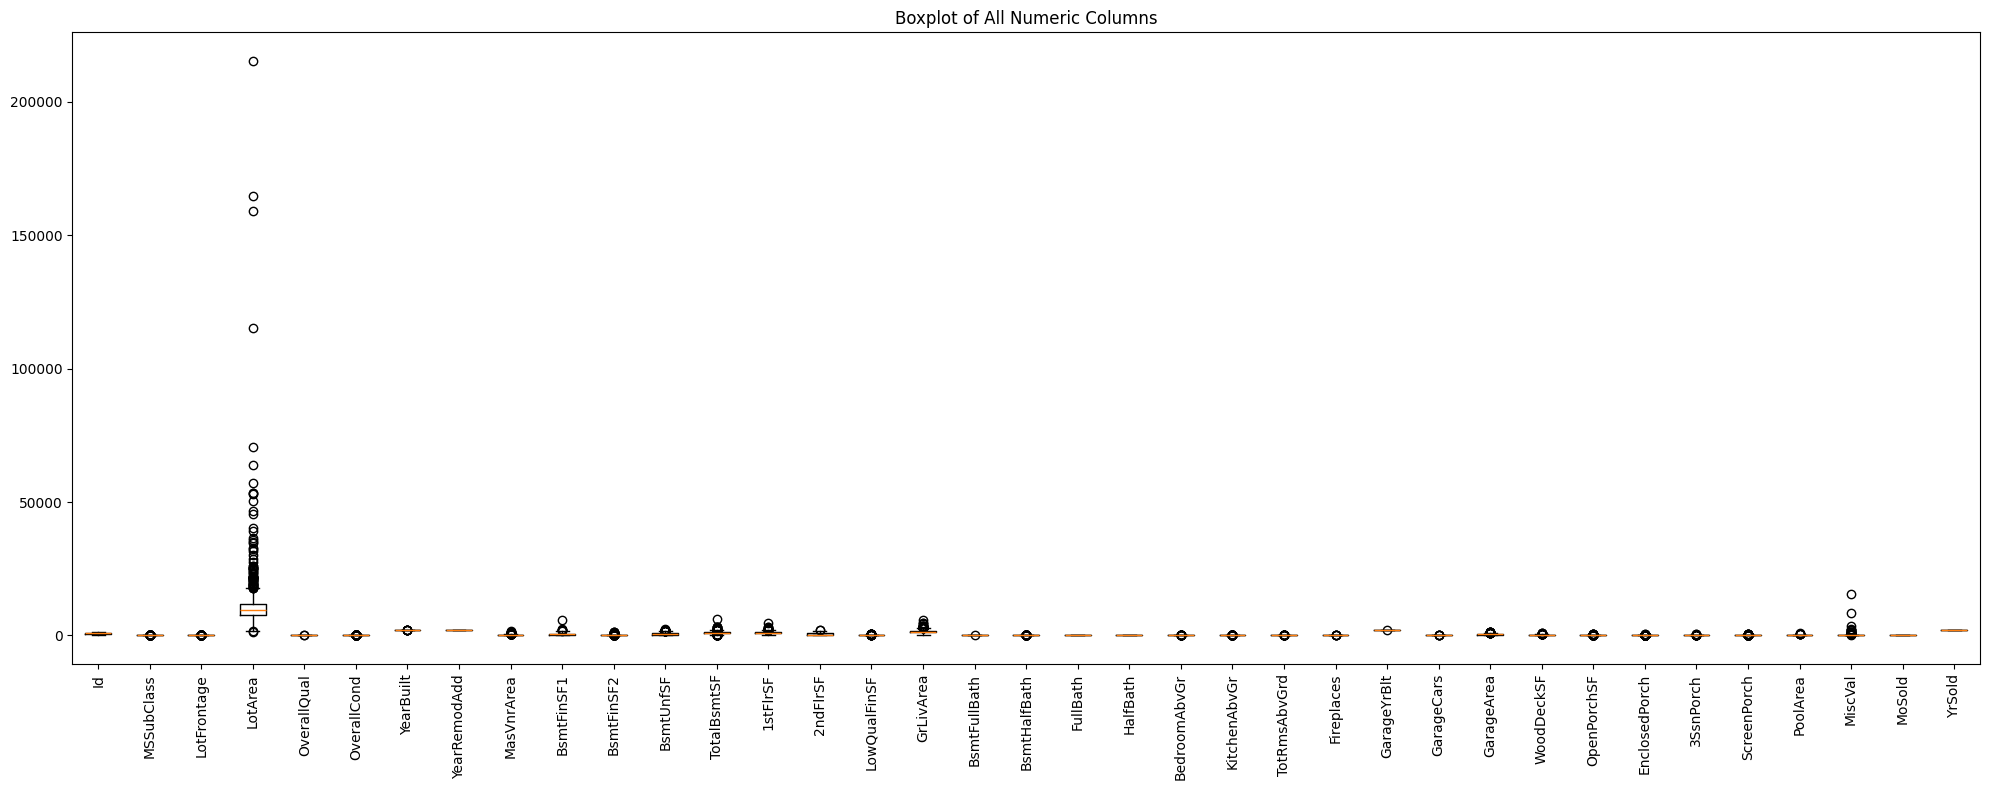

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_train_common.select_dtypes(include="number")
plt.figure(figsize=(20, 8))
plt.boxplot(numeric_df.values, labels=numeric_df.columns, vert=True)
plt.xticks(rotation=90)
plt.title("Boxplot of All Numeric Columns")
plt.tight_layout()
plt.show()


/tmp/ipython-input-19-2668114793.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(numeric_col.values, labels=numeric_col.columns, vert=True)


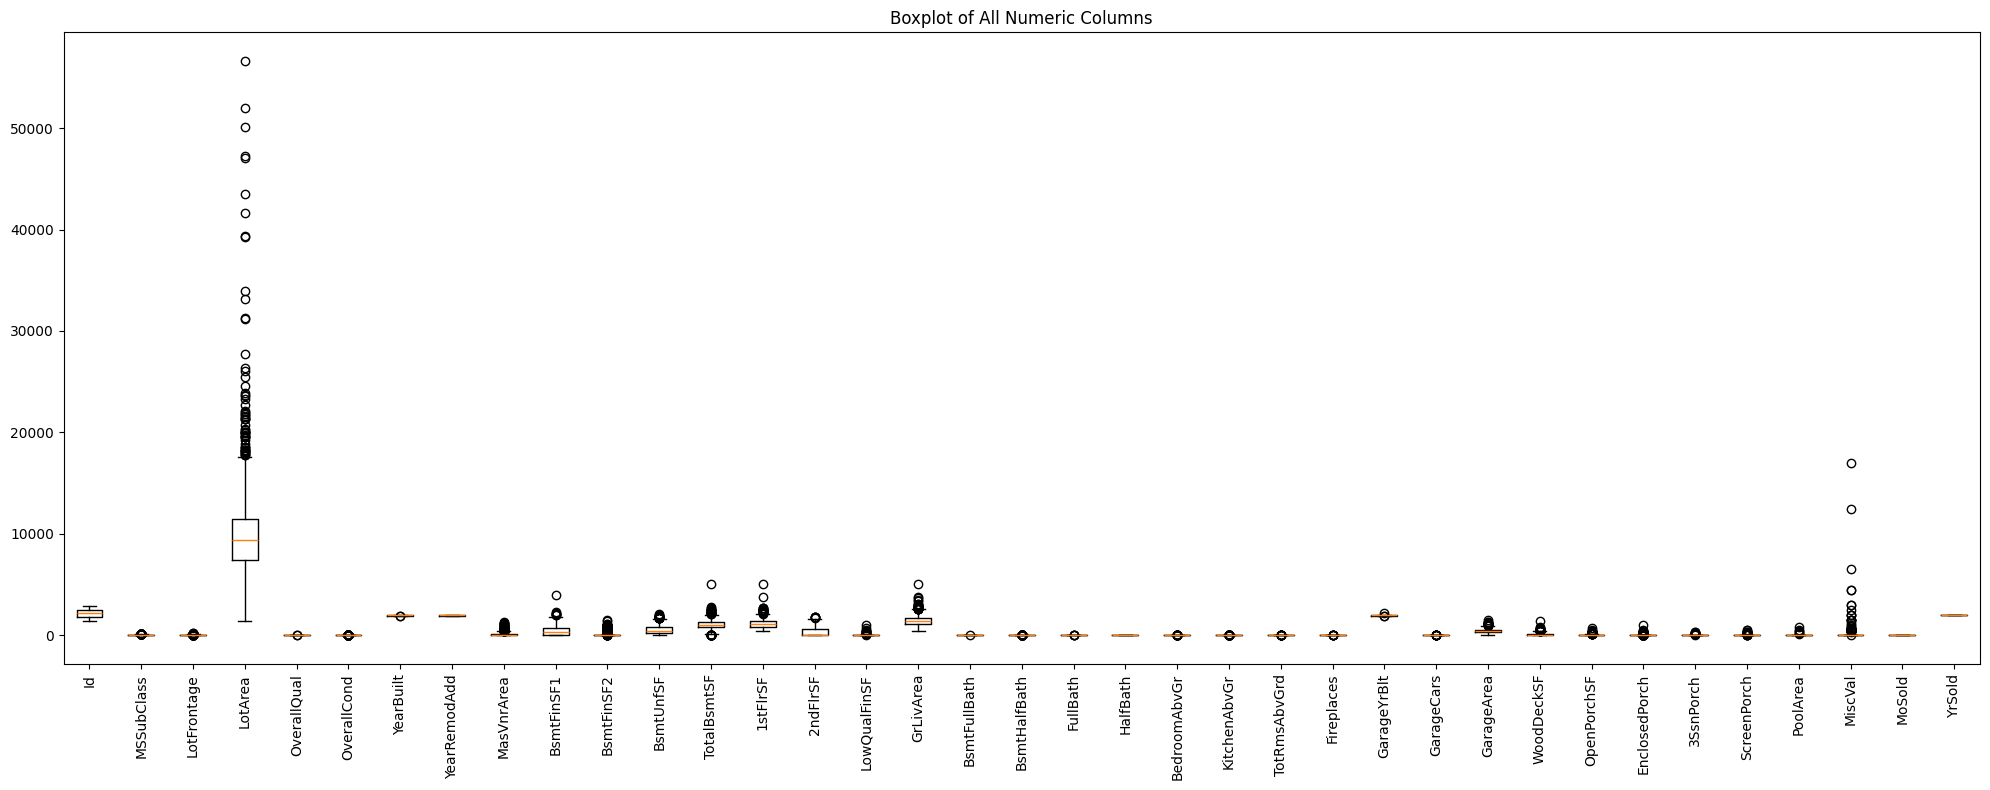

In [19]:
numeric_col = df_test_common.select_dtypes(include="number")
plt.figure(figsize=(20, 8))
plt.boxplot(numeric_col.values, labels=numeric_col.columns, vert=True)
plt.xticks(rotation=90)
plt.title("Boxplot of All Numeric Columns")
plt.tight_layout()
plt.show()


### There are some outliers present in certain columns. For building an accurate model , outliers need to be handled. Clipped the outliers with lower and upper values.

In [20]:
import numpy as np
# Creating a function for clipping outliers using IQR method
def clip_outliers_iqr(df_train,df_test):
    '''to cap outliers using inter quartile range'''
    df_train = df_train_common.copy()
    df_test= df_test_common.copy()
    num = df_train.select_dtypes(include="number").columns # selecting numerical column

    Q1 = df_train[num].quantile(0.25)
    Q3 = df_train[num].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers

    df_train[num]= df_train[num].clip(lower=lower_bound, upper=upper_bound, axis=1)
    df_test[num] =df_test[num].clip(lower=lower_bound, upper=upper_bound, axis=1)

    return df_train , df_test

In [21]:
df_train, df_test= clip_outliers_iqr(df_train_common, df_test_common)

#### Handling Skewness

In [22]:
df_train.skew(numeric_only=True).sort_values(ascending=False)

,0
MasVnrArea,1.287759
OpenPorchSF,1.136301
WoodDeckSF,1.083673
MSSubClass,1.019624
2ndFlrSF,0.800109
BsmtUnfSF,0.796931
BsmtFinSF1,0.739877
HalfBath,0.675897
1stFlrSF,0.664134
GrLivArea,0.593556


In [23]:
df_test.skew(numeric_only=True).sort_values(ascending=False)

,0
MasVnrArea,1.343660
OpenPorchSF,1.118187
WoodDeckSF,1.104194
MSSubClass,0.973321
2ndFlrSF,0.910425
BsmtUnfSF,0.850892
BsmtFinSF1,0.818670
GrLivArea,0.729690
HalfBath,0.714728
Fireplaces,0.677482


### There is a slight skewness in the data. Handled the skewness by applying logarithmic and square transformation for positive and negative skewness respectively.

In [24]:
skewness=df_train.select_dtypes("number").skew()
for col in skewness.index:
    if skewness[col]>0.5:
        df_train[col]=np.log1p(df_train[col])
        df_test[col]=np.log1p(df_test[col])
    elif skewness[col]<-0.5:
        df_train[col]=np.square(df_train[col])
        df_test[col]=np.square(df_test[col])

print("tranformations applied to",skewness[abs(skewness)>0.5].index.tolist())


tranformations applied to ['MSSubClass', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF']


In [25]:
df_train.skew(numeric_only=True).sort_values(ascending=False).head()

,0
HalfBath,0.566168
MasVnrArea,0.480981
BsmtFullBath,0.414154
TotRmsAbvGrd,0.366919
2ndFlrSF,0.289583


In [26]:
# Checking for any columns with constant values after preprocessing steps.

constant_cols_train = [col for col in df_train.columns
                  if df_train[col].dropna().nunique() == 1]
constant_cols_test= [col for col in df_test.columns
                     if df_test[col].dropna().nunique()==1]
print("constant columns in train :",constant_cols_train)
print("constant columns in test :",constant_cols_test)


constant columns in train : ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
constant columns in test : ['Utilities', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [27]:
# Dropped the columns with constant values
df_train.drop(constant_cols_train,axis=1,inplace=True)
df_test.drop(constant_cols_test,axis=1,inplace=True)

In [28]:
# Shape after dropping constant columns.
print("train shape:",df_train.shape)
print("test shape :",df_test.shape)


train shape: (1460, 65)
test shape : (1459, 64)


In [29]:
# Aligning the mismatched number of columns in train and test data.
common_columns = df_train.columns.intersection(df_test.columns)

# Keep only those columns in both dataframes
df_train = df_train[common_columns].copy()
df_test = df_test[common_columns].copy()

In [30]:
print("train shape:",df_train.shape)
print("test shape :",df_test.shape)

train shape: (1460, 64)
test shape : (1459, 64)


##**Exploratory Data Analysis**

In [31]:
df = df_train.copy()
df["SalePrice"]= y_train.copy()
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,RL,65.0,8450.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,4.127134,2,2008,WD,Normal,208500
1,2,3.044522,RL,80.0,9600.0,Pave,Reg,Lvl,FR2,Gtl,...,TA,TA,Y,5.700444,0.000000,5,2007,WD,Normal,181500
2,3,4.110874,RL,68.0,11250.0,Pave,IR1,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,3.761200,9,2008,WD,Normal,223500
3,4,4.262680,RL,60.0,9550.0,Pave,IR1,Lvl,Corner,Gtl,...,TA,TA,Y,0.000000,3.583519,2,2006,WD,Abnorml,140000
4,5,4.110874,RL,84.0,14260.0,Pave,IR1,Lvl,FR2,Gtl,...,TA,TA,Y,5.262690,4.442651,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,RL,62.0,7917.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,3.713572,8,2007,WD,Normal,175000
1456,1457,3.044522,RL,85.0,13175.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,5.857933,0.000000,2,2010,WD,Normal,210000
1457,1458,4.262680,RL,66.0,9042.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,4.110874,5,2010,WD,Normal,266500
1458,1459,3.044522,RL,68.0,9717.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,5.905362,0.000000,4,2010,WD,Normal,142125


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Analysis of Roof Styles and their Average Sales Price

In [33]:
roof_price = df.groupby("RoofStyle")["SalePrice"].agg(['count','mean']).reset_index()
roof_price

,RoofStyle,count,mean
0,Flat,13,194690.000000
1,Gable,1141,171483.956179
2,Gambrel,11,148909.090909
3,Hip,286,218876.933566
4,Mansard,7,180568.428571
5,Shed,2,225000.000000


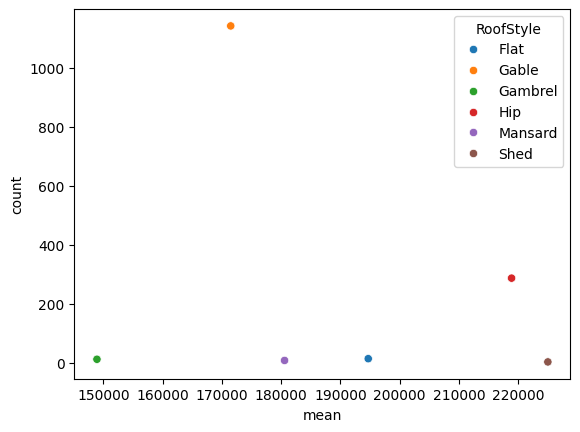

In [34]:
sns.scatterplot(roof_price,x="mean",y='count',hue ="RoofStyle")
plt.show()

**Insights**
* Most preferred roof style is Gable in the range of 170000-1750000.
* Second most roof style is Hip model , which costs high upto 220000.
* Rest four styled houses are less than 100.
* More than 1100 houses have gable roof style.

#### Sale Type and Sale Price

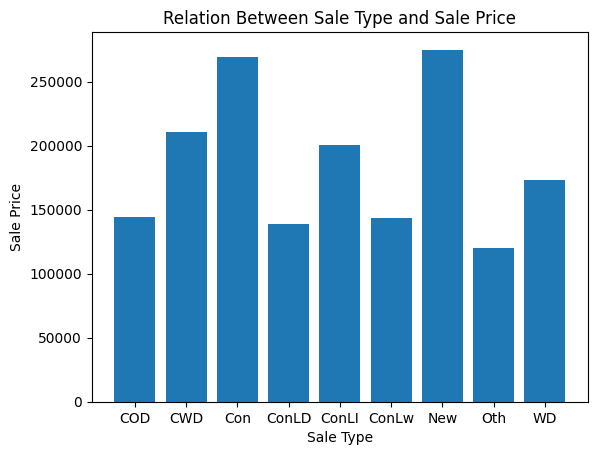

In [35]:
type_price= df.groupby("SaleType")["SalePrice"].mean()

plt.bar(type_price.index,type_price.values)
plt.xlabel("Sale Type")
plt.ylabel("Sale Price")
plt.title("Relation Between Sale Type and Sale Price")
plt.show()

### Insights: Relation Between Sale Type and Sale Price

- **New** (newly constructed home, first sale) and **Con** (contract sale) have the highest average sale prices, both above $270,000.

- **CWD** (cash and warranty deed) and **ConLI** (contract with low interest) also show high sale prices, around or above $200,000.

- **Oth** (other) has the lowest average sale price, around $120,000.

- **COD** (court officer deed) and **ConLD** (contract with low down payment) have relatively low sale prices, generally below $150,000.

- **WD** (warranty deed - conventional sale) has a mid-range average price, approximately $175,000.

- Overall, the sale type influences house price significantly, with new constructions and favorable contract types linked to higher values.

### Relation Between house style and sales price

In [36]:
house_price= df.groupby("HouseStyle")["SalePrice"].agg(["count","mean"]).reset_index()
house_price

,HouseStyle,count,mean
0,1.5Fin,154,143116.740260
1,1.5Unf,14,110150.000000
2,1Story,726,175985.477961
3,2.5Fin,8,220000.000000
4,2.5Unf,11,157354.545455
5,2Story,445,210051.764045
6,SFoyer,37,135074.486486
7,SLvl,65,166703.384615


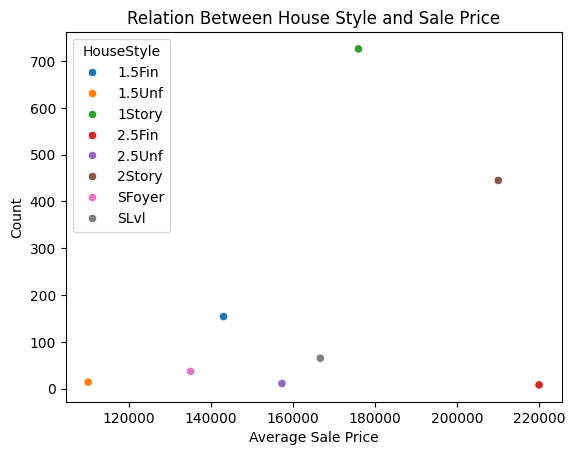

In [54]:


sns.scatterplot(house_price,x="mean",y="count",hue="HouseStyle")
plt.title("Relation Between House Style and Sale Price")
plt.xlabel("Average Sale Price")
plt.ylabel("Count")
plt.show()

### **Insights**
* Highest price range is for finished 2.5 story house, in the range of $220000 .

* Least price is for unfinished 1.5 story ,i.e, less than $120000.

* Most common house style is one story house with the count near to 725.

* Second most commom house style is 2 story house with high price range greater than $200000.

* Bigger the house and more the facilities means higher the price.





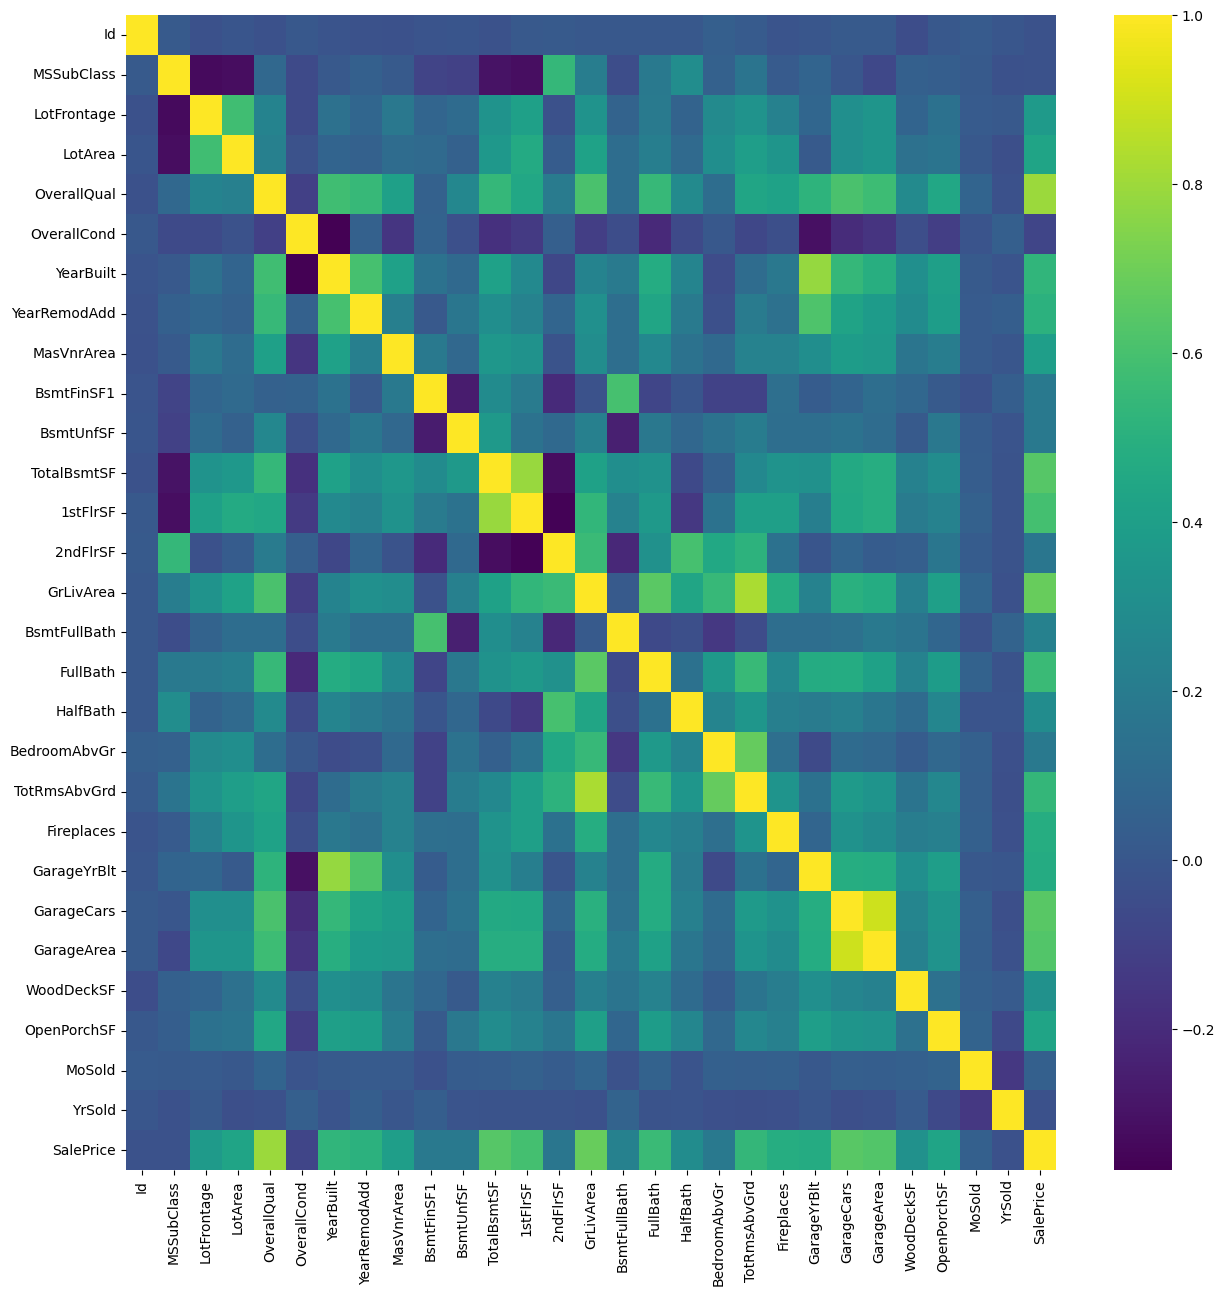

In [38]:
num= df.select_dtypes("number")
plt.figure(figsize=(15,15))
sns.heatmap(num.corr(),cmap="viridis")
plt.show()


###**Insights**
* There is a strong relationship between overall quality and sales price. As the quality increases price also increases.

* Garage Area and Garage Cars are related, it is normal to expect more garage space for more cars.

* Some features are related , as characteristics of a house depends on each other.

* Like garage year built and year house built will be same .Similarly, ground space determines  the area for first floor.


* There is not a visible multicollinearity in the data.


##**Feature Engineering**

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [40]:
X_train = df_train.copy()
X_test = df_test.copy()
print("Shape of x train :",X_train.shape)
print("Shape of y train :",y_train.shape)
print("Shape of x test :",X_test.shape)

Shape of x train : (1460, 64)
Shape of y train : (1460,)
Shape of x test : (1459, 64)


In [41]:
X_train = X_train.drop(columns=['Id'], errors='ignore')
X_test = X_test.drop(columns=['Id'], errors='ignore')

### Feature Encoding

In [42]:
# encoding categorical features using one hot encoding.
X_train=pd.get_dummies(X_train,dtype='int',drop_first=True)
X_test=pd.get_dummies(X_test,dtype="int",drop_first=True)
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,65.0,8450.0,7,1.791759,4012009,4012009,5.283204,6.561031,5.017280,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,80.0,9600.0,6,2.140066,3904576,3904576,0.000000,6.886532,5.652489,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,68.0,11250.0,7,1.791759,4004001,4008004,5.093750,6.188264,6.075346,...,0,0,0,0,1,0,0,0,1,0
3,4.262680,60.0,9550.0,7,1.791759,3667225,3880900,0.000000,5.379897,6.293419,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,84.0,14260.0,8,1.791759,4000000,4000000,5.860786,6.486161,6.196444,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,62.0,7917.0,6,1.791759,3996001,4000000,0.000000,0.000000,6.860664,...,0,0,0,0,1,0,0,0,1,0
1456,3.044522,85.0,13175.0,6,1.945910,3912484,3952144,4.787492,6.673298,6.380123,...,0,0,0,0,1,0,0,0,1,0
1457,4.262680,66.0,9042.0,7,2.140066,3767481,4024036,0.000000,5.620401,6.777647,...,0,0,0,0,1,0,0,0,1,0
1458,3.044522,68.0,9717.0,5,1.945910,3802500,3984016,0.000000,3.912023,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 219 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(19), int64(200)
memory usage: 2.4 MB


In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 204 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(21), int64(183)
memory usage: 2.3 MB


After encoding, train data has 219 entries, whereas test data has 204 entries. we need to align the columns to same number for building the model.

In [45]:
# Aligning the columns in train and test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

### Feature Selection using Select K best

In [46]:
# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Initialize and apply SelectKBest (selecting 50 feature)
selector = SelectKBest(score_func=f_regression,k=50)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # Apply same transformation on test data

# Get selected features and their scores
selected_features = X_train.columns[selector.get_support()]
selected_features_score = pd.DataFrame({
    "Feature": selected_features,
    "Score": selector.scores_[selector.get_support()]
})

# Sort features by score in descending order
selected_features_score = selected_features_score.sort_values(by="Score", ascending=False)

# Display selected features with scores
print(selected_features_score)

                  Feature        Score
2             OverallQual  2453.038335
8               GrLivArea  1284.010923
15             GarageCars  1033.195352
6             TotalBsmtSF   995.585538
16             GarageArea   960.207172
7                1stFlrSF   777.711596
29           ExterQual_TA   774.677019
10               FullBath   668.430296
12           TotRmsAbvGrd   587.935833
3               YearBuilt   558.791093
41         KitchenQual_TA   538.358524
45       GarageFinish_Unf   523.246497
4            YearRemodAdd   505.376311
33            BsmtQual_TA   482.240464
31       Foundation_PConc   480.156815
13             Fireplaces   437.432643
14            GarageYrBlt   410.372307
28           ExterQual_Gd   375.329470
36       BsmtFinType1_GLQ   339.503144
1                 LotArea   334.940368
18            OpenPorchSF   334.124959
23   Neighborhood_NridgHt   281.282911
5              MasVnrArea   269.938244
0             LotFrontage   233.500632
47           SaleType_New

In [47]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_selected)
X_test_scaled=scaler.transform(X_test_selected)

## **Linear Regression Model**

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lin_reg= LinearRegression()
results=[]
lin_reg.fit(X_train_scaled,y_train)

y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test= lin_reg.predict(X_test_scaled)
print("r2 score train",r2_score(y_train,y_pred_train))



r2 score train 0.8482840523595064


In [56]:
y_pred_test

array([121044.83715205, 166900.97886782, 180345.72722062, ...,
       179017.95869096, 115291.31168312, 211520.84847847])

In [57]:
# Cross validating to evaluate model performance
from sklearn.model_selection import cross_val_score

model = LinearRegression()

# 5-fold cross-validation using R² score
scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", np.mean(scores))

Cross-validated R² scores: [0.86741267 0.8217719  0.82678169 0.84747551 0.78954645]
Mean R²: 0.8305976451462133


In [51]:
# Saved the predicted values as submission.
submission = pd.DataFrame({
    'PredictedValue': y_pred_test
})
submission.to_csv("submission.csv", index=False)

In [52]:
submission

,PredictedValue
0,121044.837152
1,166900.978868
2,180345.727221
3,192827.081023
4,183663.047627
...,...
1454,67074.804597
1455,57327.693278
1456,179017.958691
1457,115291.311683


##**Conclusion**
In this house price prediction project, we applied a linear regression model to estimate property values based on key housing features such as area, number of rooms, and overall condition. After performing data cleaning, exploratory data analysis, and necessary preprocessing, the model was trained and evaluated using appropriate metrics. Despite using a single algorithm, the results show that linear regression can provide a reasonably good approximation of house prices, capturing important trends and relationships within the dataset. This project lays the foundation for future improvements, such as trying more advanced algorithms or incorporating additional variables to increase predictive accuracy.

